In [2]:
import pandas as pd 
#Membaca dataset 
data = pd.read_csv('data.csv')
#melihat 5 baris pertama
print(data.head())
#menampilkan ringkasan informasi data
print(data.info())

         id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

   ...  texture_worst  perimeter_worst  area_worst  smoothness

In [3]:
#fokus ke radius_mean
#mean 
mean_value = data['radius_mean'].mean()
print('Mean:', mean_value)
#median 
median_value = data['radius_mean'].median()
print('Median:', median_value)
#mode
mode_value = data['radius_mean'].mode()[0]
print('Mode:', mode_value)

Mean: 14.127291739894552
Median: 13.37
Mode: 12.34


In [5]:
#range 
range_value = data['radius_mean'].max() - data['radius_mean'].min()
print('Range:', range_value)
#variance
variance_value = data['radius_mean'].var()
print('Variance:', variance_value)
#standard devation
std_dev_value = data['radius_mean'].std()
print('Standard Deviation: ', std_dev_value)

Range: 21.128999999999998
Variance: 12.418920129526722
Standard Deviation:  3.5240488262120775


In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

#historigram
plt.figure(figsize=(8,6))
sns.histplot(data['column_name'], kde=True)
plt.title('Histogram of Colum')
plt.show()
#boxplot
plt.figure(figsze=(8,6))
sns.boxplot(data=data['column_name'])
plt.title('Boplot of Column')
plt.show()

KeyError: 'column_name'

<Figure size 800x600 with 0 Axes>

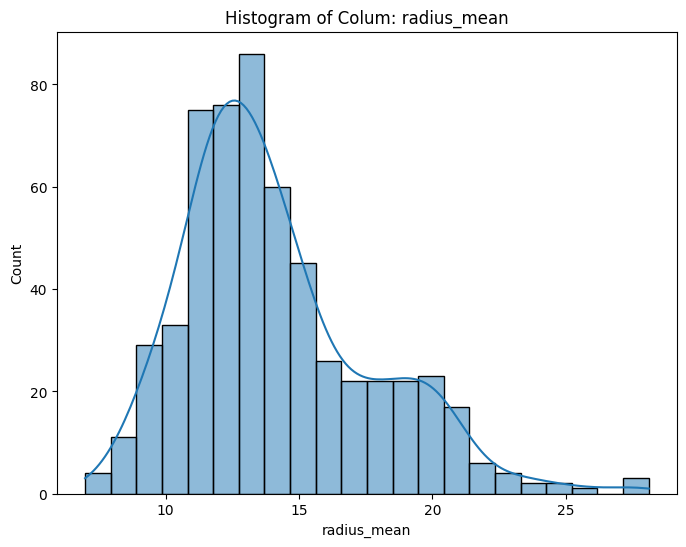

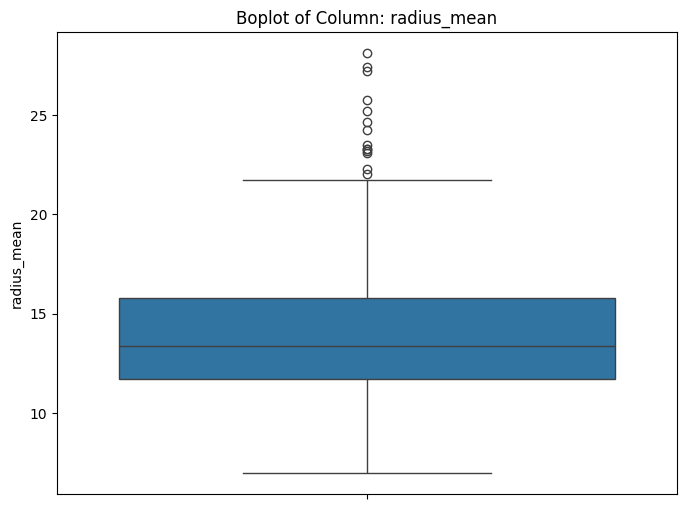

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

#historigram
plt.figure(figsize=(8,6))
sns.histplot(data['radius_mean'], kde=True)
plt.title('Histogram of Colum: radius_mean')
plt.show()
#boxplot
plt.figure(figsize=(8,6))
sns.boxplot(data=data['radius_mean'])
plt.title('Boplot of Column: radius_mean')
plt.show()

In [14]:
percentile_25 = data['radius_mean'].quantile(0.25)
percentile_50 = data['radius_mean'].quantile(0.50)
percentile_75 = data['radius_mean'].quantile(0.75)

print(f'25th Percentile (Q1) : {percentile_25}')
print(f'50th Percentile (Median) : {percentile_50}')
print(f'75th Percentile (Q3) : {percentile_75}')

25th Percentile (Q1) : 11.7
50th Percentile (Median) : 13.37
75th Percentile (Q3) : 15.78


In [15]:
correlation = data[['radius_mean', 'texture_mean']].corr()
print('Correlation:\n, correlation')
#covariance
covariance = data[['radius_mean', 'texture_mean']].cov()
print('Covariance:\n', covariance)

Correlation:
, correlation
Covariance:
               radius_mean  texture_mean
radius_mean     12.418920      4.907582
texture_mean     4.907582     18.498909


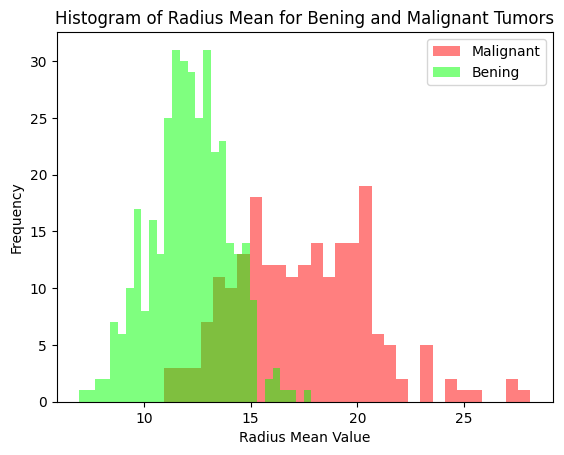

Most frequent malignant radius mean is: 20.101999999999997


In [8]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data.csv')

m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
#membafi data menjadi m dan b radius mean, data dibagi dulu menjadi 30 
plt.legend()
plt.xlabel("Radius Mean Value")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is:", most_frequent_malignant_radius_mean)

In [9]:
import pandas as pd
data = pd.read_csv('data.csv')

data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc_b = data_bening.radius_mean.describe()
desc_m = data_malignant.radius_mean.describe()
desc_b, desc_m

(count    357.000000
 mean      12.146524
 std        1.780512
 min        6.981000
 25%       11.080000
 50%       12.200000
 75%       13.370000
 max       17.850000
 Name: radius_mean, dtype: float64,
 count    212.000000
 mean      17.462830
 std        3.203971
 min       10.950000
 25%       15.075000
 50%       17.325000
 75%       19.590000
 max       28.110000
 Name: radius_mean, dtype: float64)

In [12]:
#menghitung born dan uperbown
#Khusus Benign 

Q1 = desc_b[4]
Q3 = desc_b[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR 
print("Apapun data outside this range adalah outliner: (", lower_bound, ",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outlinernya:", data_bening[(data_bening.radius_mean < lower_bound) | 
    (data_bening.radius_mean > upper_bound)].radius_mean.values)

Apapun data outside this range adalah outliner: ( 7.645000000000001 , 16.805 )
Outlinernya: [ 6.981 16.84  17.85 ]


C:\Users\lenovo\AppData\Local\Temp\ipykernel_11424\1599187119.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q1 = desc_b[4]
C:\Users\lenovo\AppData\Local\Temp\ipykernel_11424\1599187119.py:5: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  Q3 = desc_b[6]


           id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0      842302         M        17.99         10.38          122.80     1001.0   
1      842517         M        20.57         17.77          132.90     1326.0   
2    84300903         M        19.69         21.25          130.00     1203.0   
3    84348301         M        11.42         20.38           77.58      386.1   
4    84358402         M        20.29         14.34          135.10     1297.0   
..        ...       ...          ...           ...             ...        ...   
564    926424         M        21.56         22.39          142.00     1479.0   
565    926682         M        20.13         28.25          131.20     1261.0   
566    926954         M        16.60         28.08          108.30      858.1   
567    927241         M        20.60         29.33          140.10     1265.0   
568     92751         B         7.76         24.54           47.92      181.0   

     smoothness_mean  compa

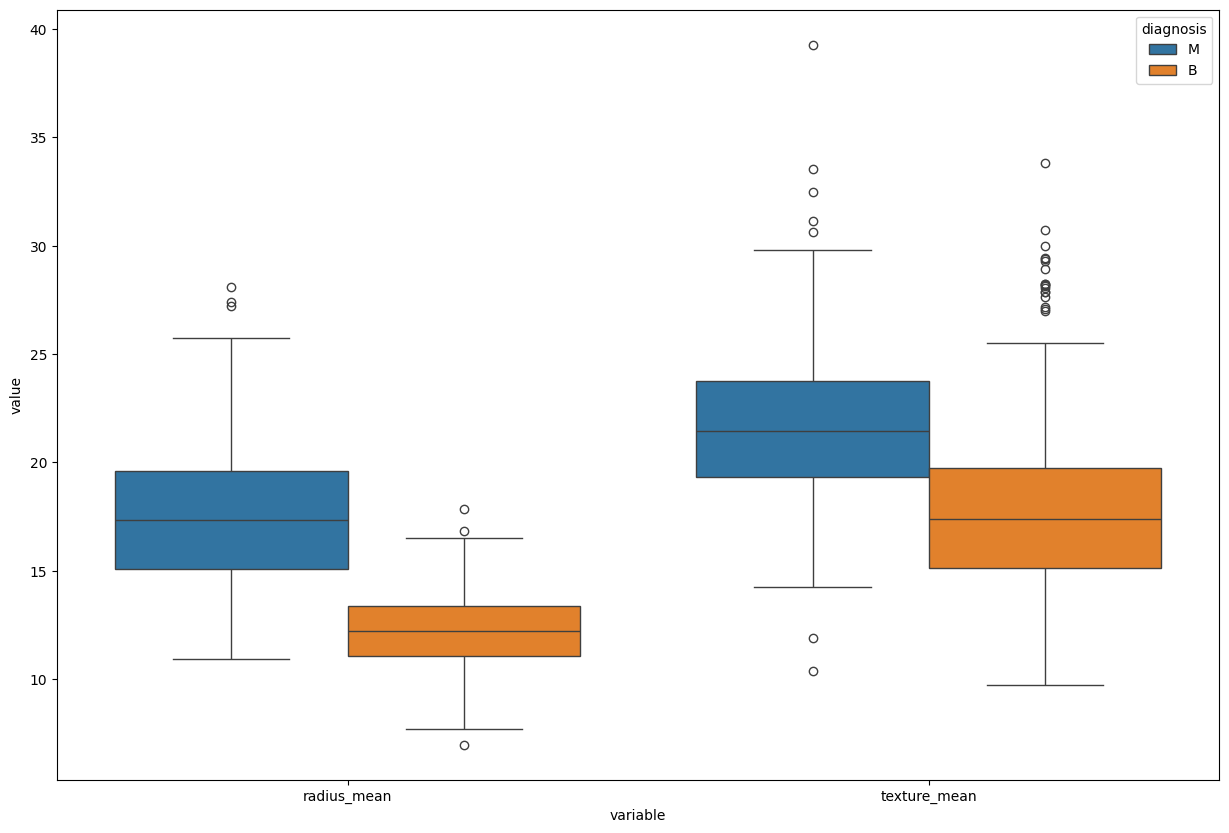

In [17]:
import matplotlib.pyplot as plt
import pandas as pd
data = pd.read_csv('data.csv')

melted_data = pd.melt(data, id_vars = "diagnosis", value_vars = ['radius_mean', 'texture_mean'])
print(data)
plt.figure(figsize=(15, 10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis", data= melted_data)
plt.show()

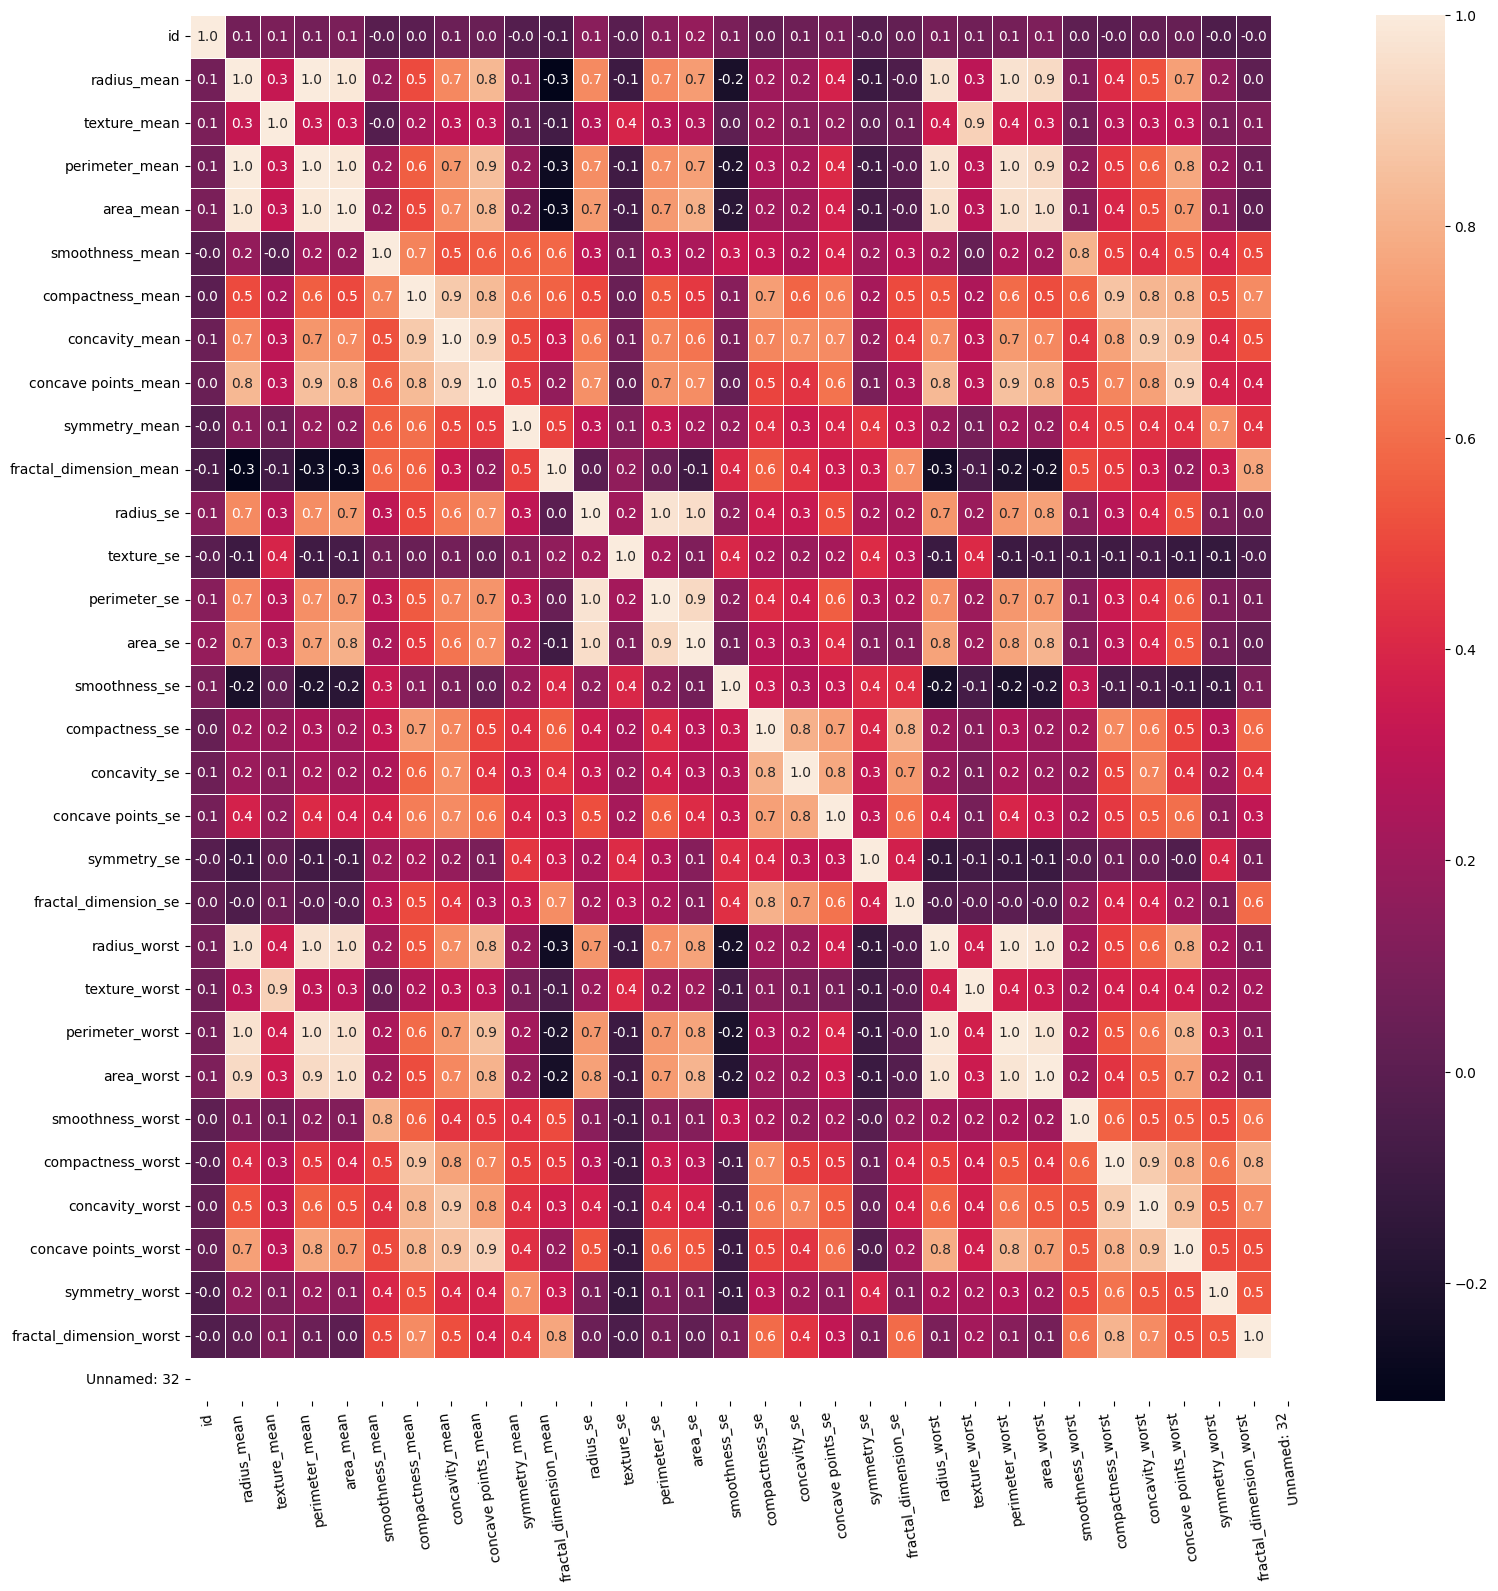

In [19]:
#KORELASI 

numerical_data = data.select_dtypes(include = ['float64', 'int64'])
f, ax = plt.subplots(figsize=(18,18))
sns.heatmap(numerical_data.corr(), annot=True, linewidths = 0.5, fmt=".1f", ax = ax)
plt.xticks(rotation=98)
plt.yticks(rotation=0)
plt.show()

In [24]:

p1 = data.loc[:,["area_mean", "radius_mean"]].corr(method= "pearson")
p2 = data.radius_mean.cov(data.area_mean)//(data.radius_mean.std()*data.area_mean.std())
print('Pearson Correlation: ')
print(p1)
print('Pearson Correlation: ', p2)

Pearson Correlation: 
             area_mean  radius_mean
area_mean     1.000000     0.987357
radius_mean   0.987357     1.000000
Pearson Correlation:  0.0


In [25]:
ranked_data = data.rank()
print(ranked_data)
spearman_corr = ranked_data.loc[:, ["area_mean", "read_mean"]].corr(method= "pearson")
print("Spearman's correlation:")
print(spearman_corr)

        id  diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     42.0      463.5        476.5           2.0           492.0      478.0   
1     43.0      463.5        540.0         223.0           528.5      544.0   
2    489.0      463.5        519.0         396.5           517.5      516.0   
3    490.0      463.5        118.0         364.0           173.0      100.0   
4    491.0      463.5        532.0          64.0           539.0      537.0   
..     ...        ...          ...           ...             ...        ...   
564  382.0      463.5        552.0         453.0           550.0      553.0   
565  383.0      463.5        526.0         554.0           524.0      529.0   
566  384.0      463.5        446.0         549.0           442.0      447.0   
567  385.0      463.5        543.0         558.0           547.0      532.0   
568   41.0      179.0          4.0         503.0             2.0        4.0   

     smoothness_mean  compactness_mean  concavity_m

KeyError: "['read_mean'] not in index"